In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Snakebite deaths in the Million Death Study, age-standardized and age-specific mortality rates and risks in India from 2001-2014.**

In [ ]:
# Load the dataset
df=pd.read_csv('C:\Users\Admin\Desktop\Feynn Labs- ML INtern\project 3\dataset\mortality rates by age.csv')

In [ ]:
#to display the first 3 rows of a Dataset
df.head(3)

,Year,Study deaths from snakebite/all causes,All ages,0-14,15-29,30-69,Snakebite mortality risk,Estimated national deaths (000)
0,2001,199 /41826,5.3,5.4,3.6,5.9,0.40,55.0
1,2002,183 /41740,5.2,5.2,3.5,5.8,0.39,55.3
2,2003,179 /38798,5.1,5.0,3.4,5.8,0.38,55.8


In [ ]:
# df.info() method in pandas provides a concise summary of the DataFrame's structure and content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    14 non-null     int64  
 1   Study deaths from snakebite/all causes  14 non-null     object 
 2   All ages                                14 non-null     float64
 3   0-14                                    14 non-null     float64
 4   15-29                                   14 non-null     float64
 5   30-69                                   14 non-null     float64
 6   Snakebite mortality risk                14 non-null     float64
 7   Estimated national deaths (000)         14 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ KB


In [ ]:
# used to generate summary statistics of the numerical columns.
df.describe()

,Year,All ages,0-14,15-29,30-69,Snakebite mortality risk,Estimated national deaths (000)
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2007.5000,4.857143,4.507143,3.078571,5.792857,0.370714,57.671429
std,4.1833,0.393631,0.471437,0.353398,0.489056,0.027306,3.435657
min,2001.0000,4.200000,3.900000,2.600000,5.000000,0.320000,52.400000
25%,2004.2500,4.625000,4.200000,2.800000,5.475000,0.360000,55.075000
50%,2007.5000,4.950000,4.450000,3.000000,5.800000,0.380000,56.600000
75%,2010.7500,5.175000,4.775000,3.400000,5.900000,0.390000,60.950000
max,2014.0000,5.300000,5.400000,3.600000,6.700000,0.400000,62.700000


In [ ]:
df.isnull().sum()

Year                                      0
Study deaths from snakebite/all causes    0
All ages                                  0
0-14                                      0
15-29                                     0
30-69                                     0
Snakebite mortality risk                  0
Estimated national deaths (000)           0
dtype: int64

There are are no missing (null) values in the columns

In [ ]:
df.shape #dimension of dataframe

(14, 8)

In [ ]:
#Creating a copy of a DataFrame before starting the data processing
df1 = df.copy()

In [ ]:
# Split the column into two columns
df1[['Snakebite', 'All causes']] = df['Study deaths from snakebite/all causes'].str.split('/', expand=True)

# Convert the new columns to appropriate data types (int or float)
df1['Snakebite'] = df1['Snakebite'].astype(int)
df1['All causes'] = df1['All causes'].astype(int)

In [ ]:
df1.head()

,Year,Study deaths from snakebite/all causes,All ages,0-14,15-29,30-69,Snakebite mortality risk,Estimated national deaths (000),Snakebite,All causes
0,2001,199 /41826,5.3,5.4,3.6,5.9,0.40,55.0,199,41826
1,2002,183 /41740,5.2,5.2,3.5,5.8,0.39,55.3,183,41740
2,2003,179 /38798,5.1,5.0,3.4,5.8,0.38,55.8,179,38798
3,2004,190 /37380,5.0,4.6,3.5,5.7,0.38,55.6,190,37380
4,2005,244 /46755,4.9,4.8,3.4,6.4,0.40,60.8,244,46755


In [ ]:
df1.dtypes

Year                                        int64
Study deaths from snakebite/all causes     object
All ages                                  float64
0-14                                      float64
15-29                                     float64
30-69                                     float64
Snakebite mortality risk                  float64
Estimated national deaths (000)           float64
Snakebite                                   int64
All causes                                  int64
dtype: object

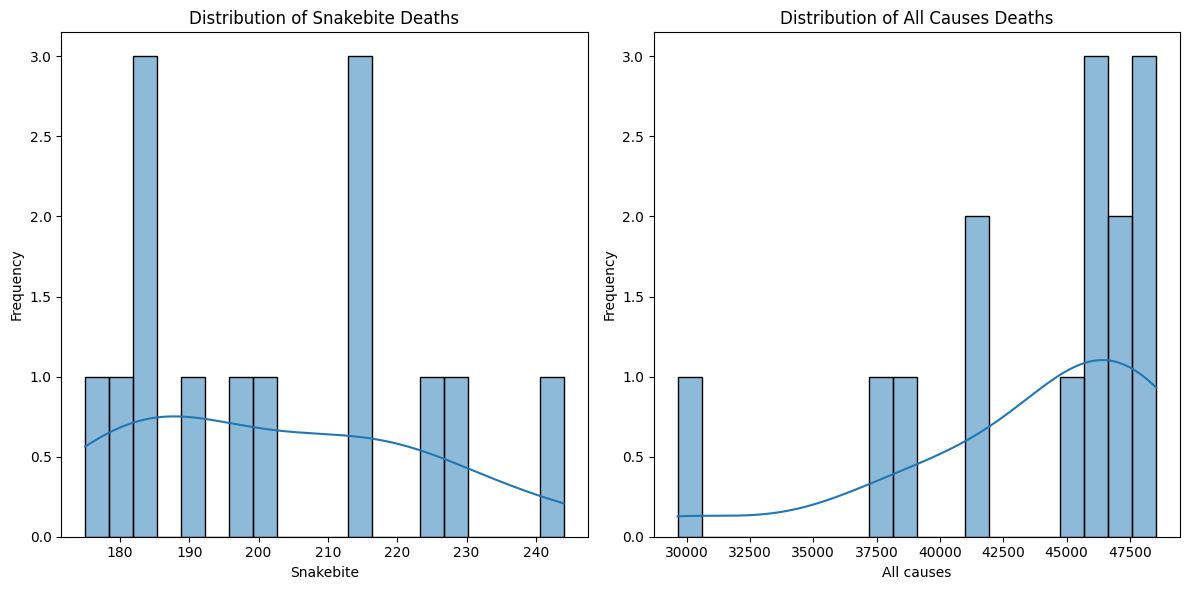

In [ ]:
# Histogram for 'Snakebite' and 'All causes'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['Snakebite'], bins=20, kde=True)
plt.xlabel('Snakebite')
plt.ylabel('Frequency')
plt.title('Distribution of Snakebite Deaths')

plt.subplot(1, 2, 2)
sns.histplot(df1['All causes'], bins=20, kde=True)
plt.xlabel('All causes')
plt.ylabel('Frequency')
plt.title('Distribution of All Causes Deaths')

plt.tight_layout()
plt.show()


In [ ]:
# Summary statistics for the numeric columns
print(df1[['Snakebite', 'All causes']].describe())


        Snakebite    All causes
count   14.000000     14.000000
mean   202.357143  43677.357143
std     21.120923   5335.296684
min    175.000000  29647.000000
25%    183.500000  41761.500000
50%    199.500000  45909.000000
75%    214.750000  47292.000000
max    244.000000  48536.000000


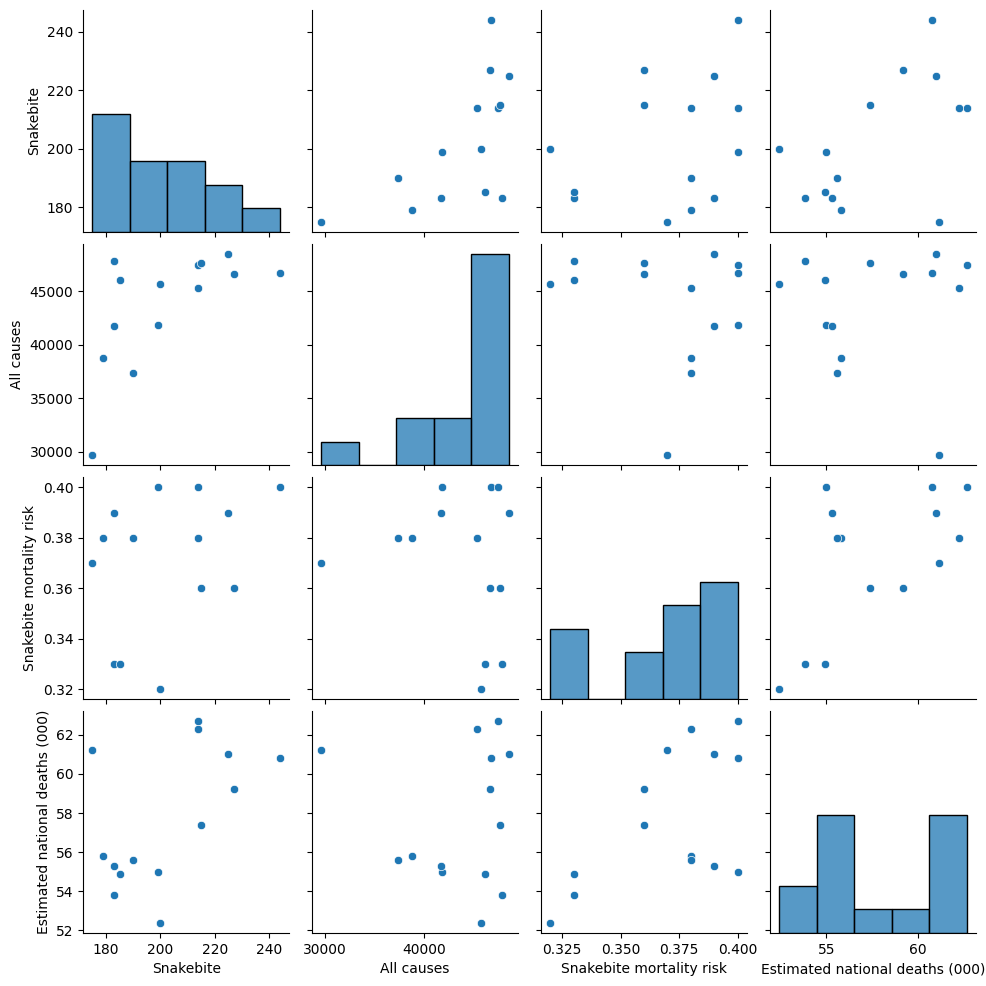

In [ ]:
# Create a pairplot to visualize relationships between multiple numeric columns
sns.pairplot(df1[['Snakebite', 'All causes', 'Snakebite mortality risk', 'Estimated national deaths (000)']])
plt.show()


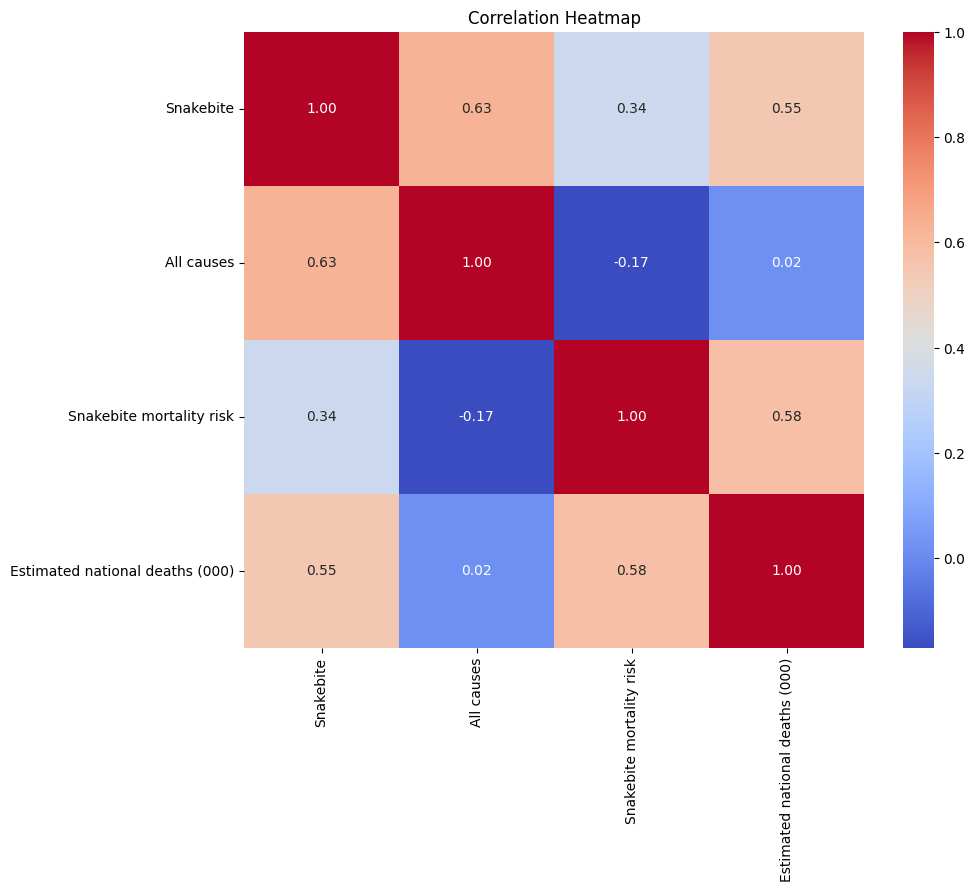

In [ ]:
# Create a correlation heatmap for all numeric columns
correlation_matrix = df1[['Snakebite', 'All causes', 'Snakebite mortality risk', 'Estimated national deaths (000)']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

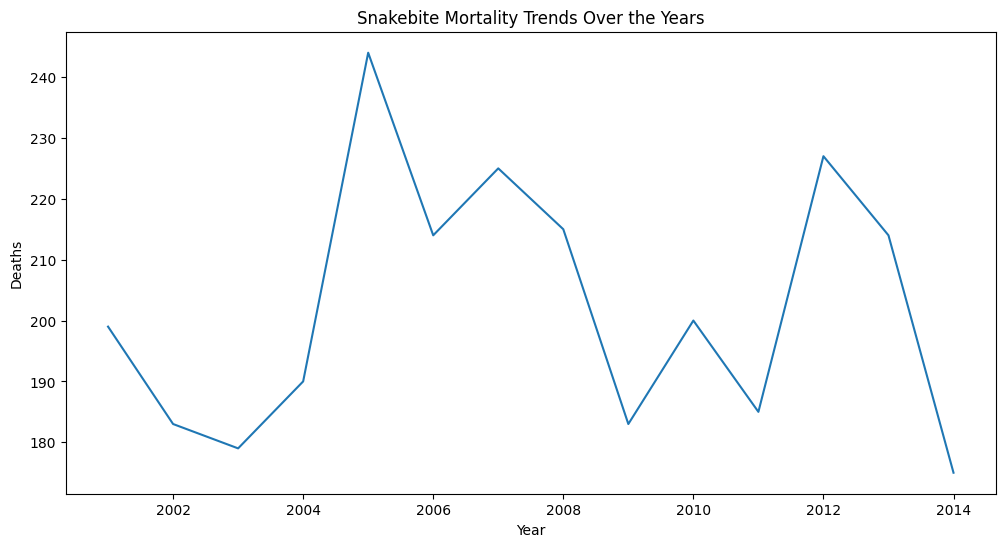

In [ ]:
# Line plot to visualize snakebite mortality trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='Year', y='Snakebite')
#sns.lineplot(data=df1, x='Year', y='All causes')
plt.xlabel('Year')
plt.ylabel('Deaths')
#plt.legend(['Snakebite', 'All causes'])
plt.title('Snakebite Mortality Trends Over the Years')
plt.show()


2004-2006 shows a peak in snakebite mortality.

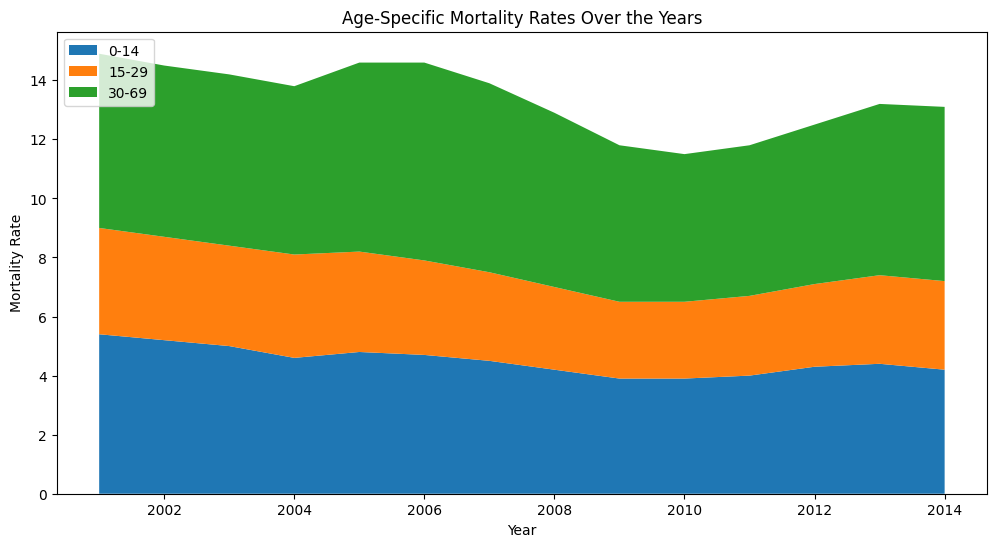

In [ ]:
# Stacked area plot to visualize age-specific mortality rates over the years
plt.figure(figsize=(12, 6))
plt.stackplot(df1['Year'], df1['0-14'], df1['15-29'], df1['30-69'], labels=['0-14', '15-29', '30-69'])
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.title('Age-Specific Mortality Rates Over the Years')
plt.legend(loc='upper left')
plt.show()

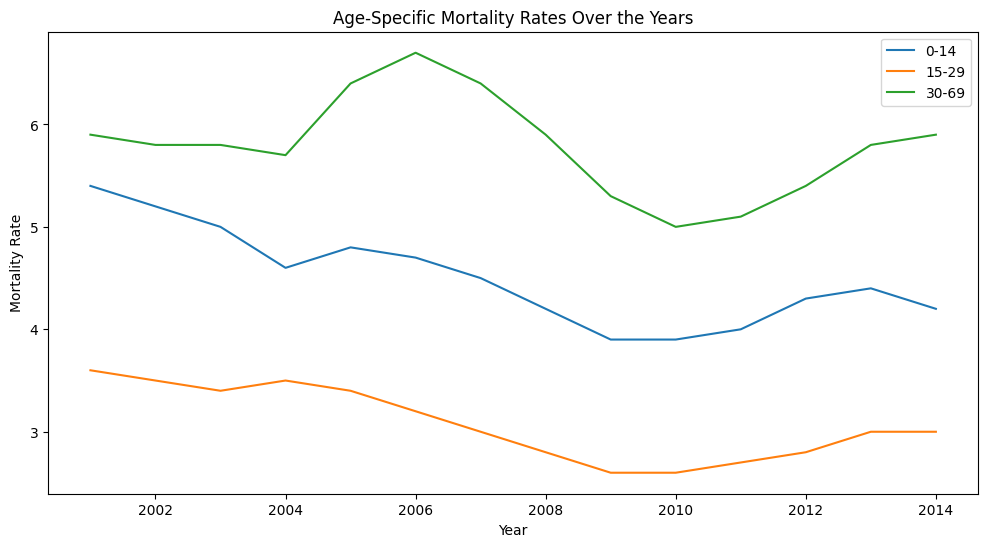

In [ ]:
# Line plot to visualize age-specific mortality rates over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='Year', y='0-14', label='0-14')
sns.lineplot(data=df1, x='Year', y='15-29', label='15-29')
sns.lineplot(data=df1, x='Year', y='30-69', label='30-69')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.title('Age-Specific Mortality Rates Over the Years')
plt.legend()
plt.show()

between 2004 and 2008 shows a peak in the mortality rate of age group 30-69. 

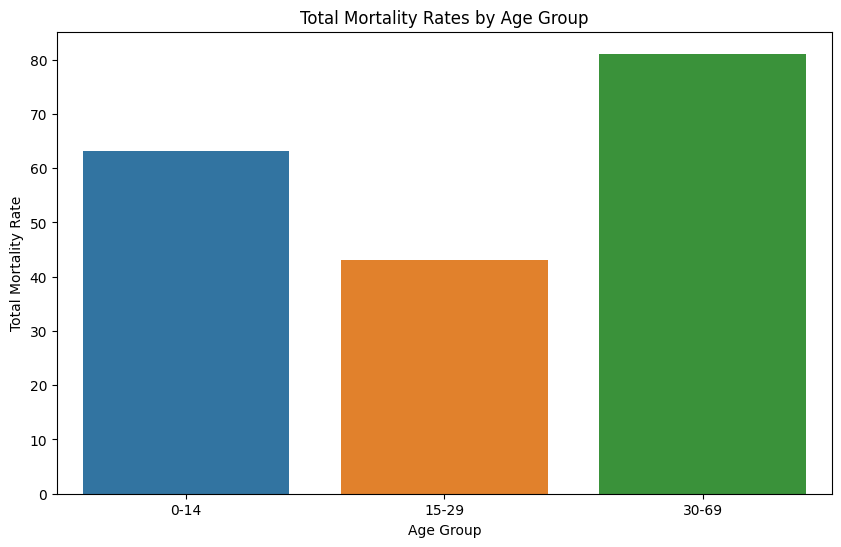

In [ ]:
# Bar plot to visualize total mortality rates by age group
total_mortality_by_age = df1[['0-14', '15-29', '30-69']].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=total_mortality_by_age.index, y=total_mortality_by_age.values)
plt.xlabel('Age Group')
plt.ylabel('Total Mortality Rate')
plt.title('Total Mortality Rates by Age Group')
plt.show()


the age group of 30-69 shows a high mortality rate.

**Snakebite death rates by state in India for 2001-2014.**

In [ ]:
#to load the dataset
df_state=pd.read_csv('C:\Users\Admin\Desktop\Feynn Labs- ML INtern\project 3\dataset\Snakebite death rates by state.csv')

In [ ]:
#to display the first 5 rows of a Dataset
df_state.head()

,State,Study deaths in MDS,2001-2004,2005-2009,2010-2014
0,Andhra Pradesh,271,8.5,7.3,5.6
1,Bihar,321,5.6,7.6,8.9
2,Odisha,191,7.5,7.2,5.9
3,Madhya Pradesh,195,6.7,7.7,6.0
4,Uttar Pradesh,322,5.2,5.9,6.0


In [ ]:
df_state.shape #dimensions of dataframe

(18, 5)

In [ ]:
# df.info() method in pandas provides a concise summary of the DataFrame's structure and content
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                18 non-null     object 
 1   Study deaths in MDS  18 non-null     int64  
 2   2001-2004            18 non-null     float64
 3   2005-2009            18 non-null     float64
 4   2010-2014            18 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 848.0+ bytes


In [ ]:
# used to generate summary statistics of the numerical columns.
df_state.describe()

,Study deaths in MDS,2001-2004,2005-2009,2010-2014
count,18.000000,18.000000,18.000000,18.000000
mean,147.888889,4.950000,4.711111,4.044444
std,95.130183,1.724989,2.305719,2.273950
min,27.000000,1.800000,0.700000,0.500000
25%,59.500000,4.100000,3.300000,2.525000
50%,161.500000,5.050000,4.250000,3.500000
75%,191.750000,5.900000,6.925000,5.825000
max,322.000000,8.500000,7.700000,8.900000


In [ ]:
df_state.isnull().sum()

State                  0
Study deaths in MDS    0
2001-2004              0
2005-2009              0
2010-2014              0
dtype: int64

There are are no missing (null) values in the columns

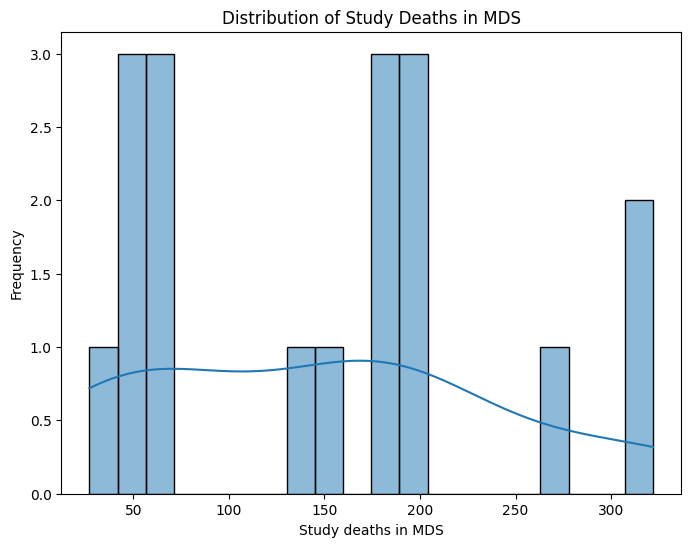

In [ ]:
#Histogram for 'Study deaths in MDS'
plt.figure(figsize=(8, 6))
sns.histplot(data=df_state, x='Study deaths in MDS', bins=20, kde=True)
plt.xlabel('Study deaths in MDS')
plt.ylabel('Frequency')
plt.title('Distribution of Study Deaths in MDS')
plt.show()

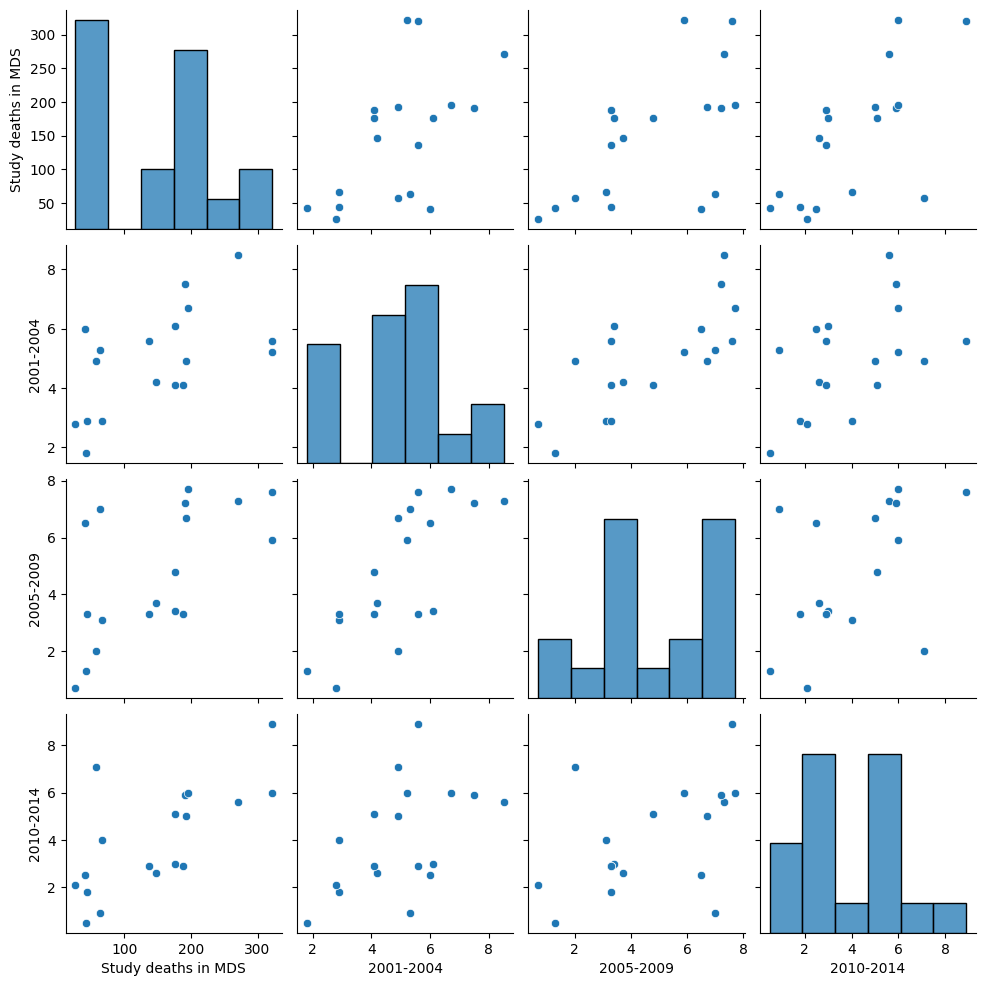

In [ ]:
# Pairplot to visualize relationships among numeric columns
sns.pairplot(df_state[['Study deaths in MDS', '2001-2004', '2005-2009', '2010-2014']])
plt.show()


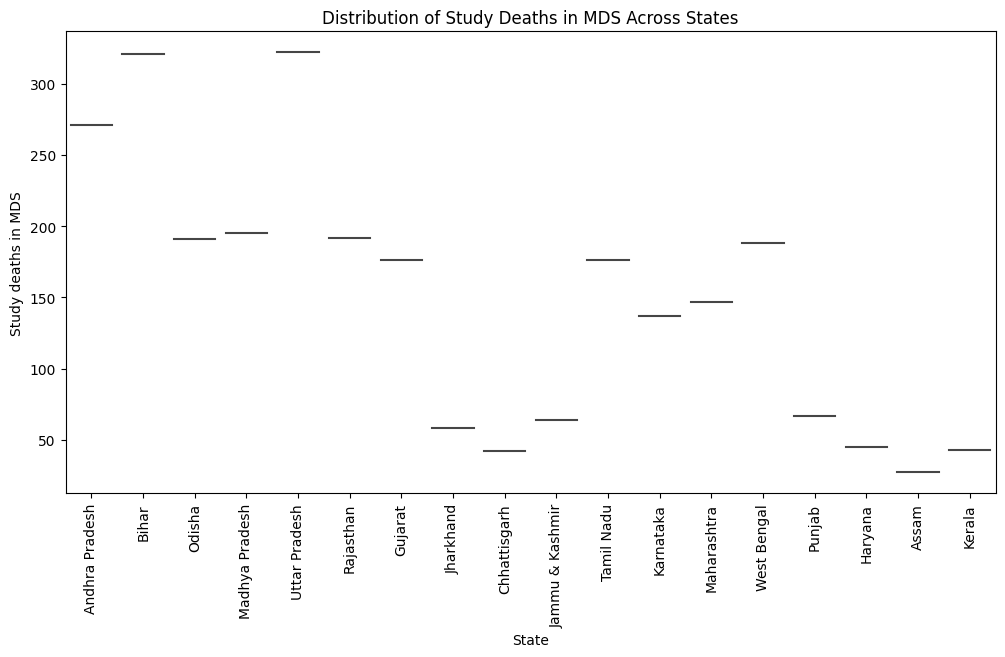

In [ ]:
# Violin plot to visualize the distribution of death rates across states
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_state, x='State', y='Study deaths in MDS')
plt.xlabel('State')
plt.ylabel('Study deaths in MDS')
plt.title('Distribution of Study Deaths in MDS Across States')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import geopandas as gpd

shapefile_path = 'C:\Users\Admin\Desktop\Feynn Labs- ML INtern\project 3\India State Shapefile\India_State_Boundary.shp'
gdf = gpd.read_file(shapefile_path)

In [ ]:
print(gdf.columns)

Index(['State_Name', 'geometry'], dtype='object')


In [ ]:
gdf.set_index('State_Name', inplace=True)

In [ ]:
# Merge the GeoDataFrame with your data based on the 'State' column in df and 'State_Name' column in gdf
merged = gdf.join(df_state.set_index('State'), how='inner')

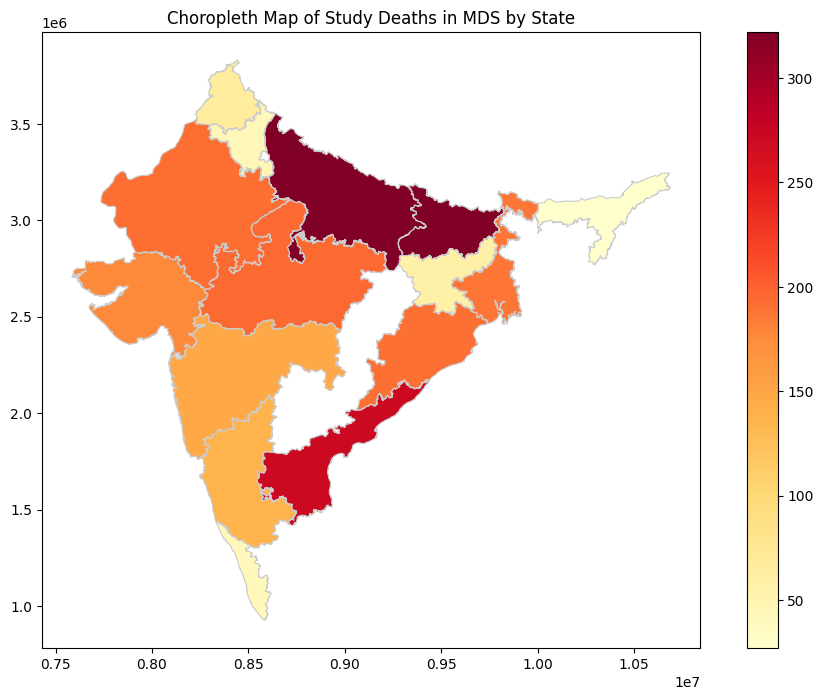

In [ ]:
# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column='Study deaths in MDS', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Choropleth Map of Study Deaths in MDS by State')
plt.show()

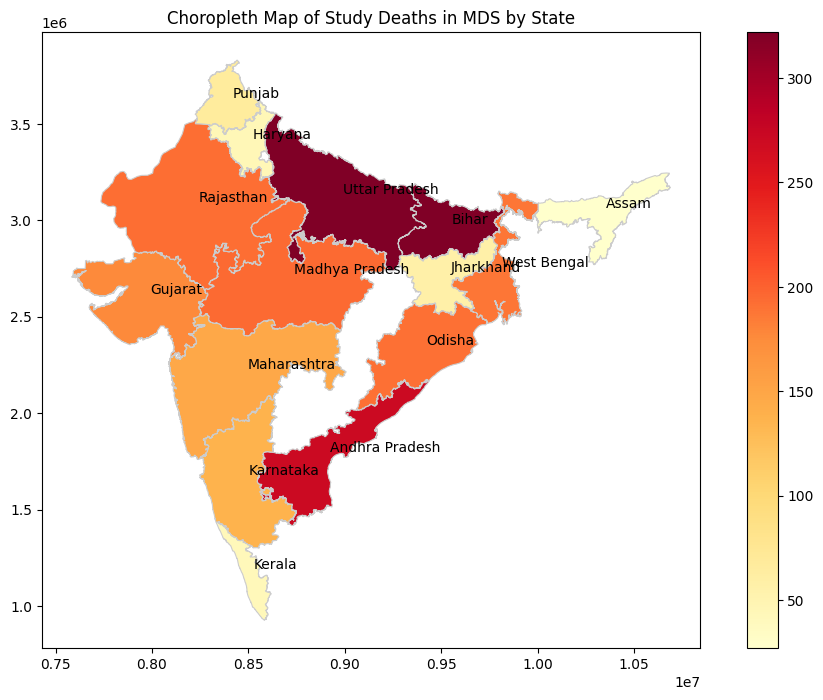

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column='Study deaths in MDS', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add labels to the map
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=10)

ax.set_title('Choropleth Map of Study Deaths in MDS by State')
plt.show()

Uttar Pradesh and Bihar show the highest Deaths, followed by Andhra Pradesh. Kerala and Assam show the least.

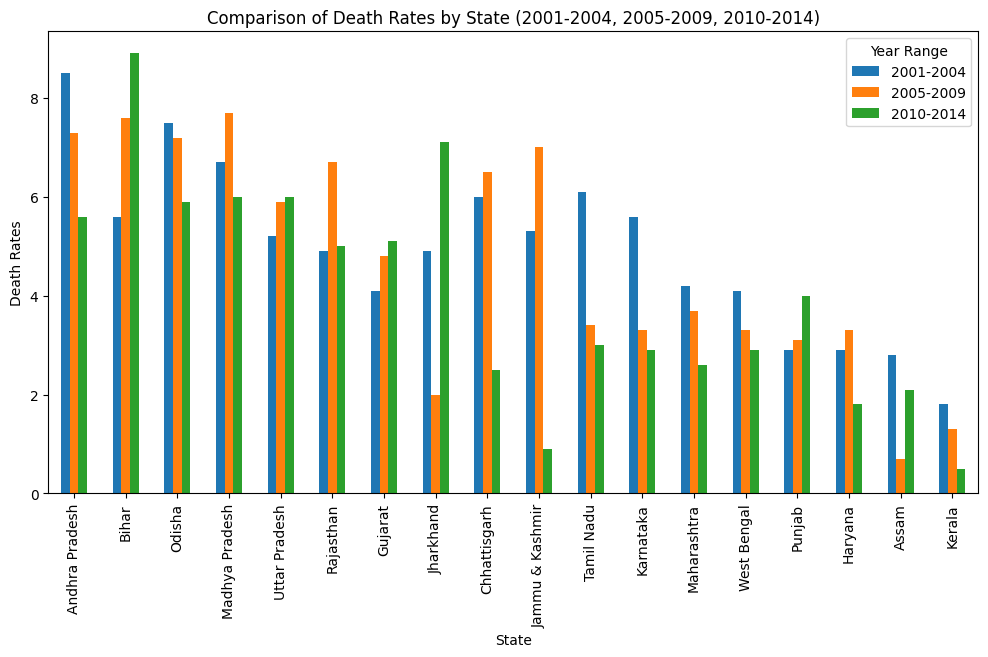

In [ ]:
# Select the relevant columns
data_to_plot = df_state[['State', '2001-2004', '2005-2009', '2010-2014']]

# Set the 'State' column as the index for easier plotting
data_to_plot.set_index('State', inplace=True)

# Plot a bar chart
data_to_plot.plot(kind='bar', figsize=(12, 6))
plt.xlabel('State')
plt.ylabel('Death Rates')
plt.title('Comparison of Death Rates by State (2001-2004, 2005-2009, 2010-2014)')
plt.xticks(rotation=90)
plt.legend(title='Year Range')
plt.show()